In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime
import pickle
import calendar
from folium.plugins import HeatMapWithTime
import seaborn as sns
import numpy as np
import gmplot

In [2]:
#set .head() to show all columns and rows if run

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load Raw Data

In [3]:
data = pd.read_csv('./data/2016.csv')

## Formatting

In [4]:
data['Call Received'] = pd.to_datetime(data['Call Received'])

In [ ]:
#data.info()

In [5]:
#rename
data = data.rename({'Event Number': 'event_num', 'Call Received': 'call_re', 'Complaint Number' : 'comp_num', 'Shift':'shift', 'Tencode':'tc', 'Tencode Description':'tc_desc', 'Tencode Suffix':'tc_suff', 'Tencode Suffix Description':'tc_suff_desc','Disposition Code':'disp_code', 'Disposition Description':'disp_desc','Block':'block','Street Name':'st_name','Unit Dispatched':'unit_disp','Sector':'sect','Zone':'zone','RPA':'rpa','Latitude':'lat','Longitiude':'long','Mapped Location':'map_loc'}, axis=1)

In [6]:
data['month'] = pd.DatetimeIndex(data['call_re']).month
data['day'] = pd.DatetimeIndex(data['call_re']).day

In [7]:
#to avoid having to recreate and reload info
data = data.to_csv('./data/df_2016_formatted.csv', index = False)

## Load Formatted Data

In [9]:
data = pd.read_csv('./data/df_2016_formatted.csv')

In [10]:
data['call_re'] = pd.to_datetime(data['call_re'])

## Stats

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127959 entries, 0 to 1127958
Data columns (total 21 columns):
event_num       1127959 non-null object
call_re         1127959 non-null datetime64[ns]
comp_num        1127959 non-null int64
shift           1080373 non-null object
tc              1127959 non-null int64
tc_desc         1127959 non-null object
tc_suff         607599 non-null object
tc_suff_desc    588170 non-null object
disp_code       1127959 non-null int64
disp_desc       1122349 non-null object
block           1089874 non-null float64
st_name         1127955 non-null object
unit_disp       1072829 non-null object
sect            1077835 non-null object
zone            1077835 non-null float64
rpa             1087923 non-null float64
lat             1082787 non-null float64
Longitude       1082787 non-null float64
map_loc         1082787 non-null object
month           1127959 non-null int64
day             1127959 non-null int64
dtypes: datetime64[ns](1), float64(5), in

## Worst Days & Weeks

Text(0, 0.5, 'Number of Incidents')

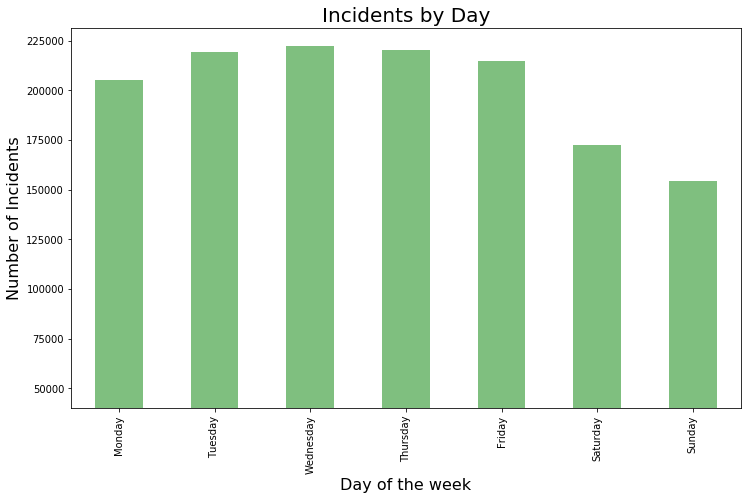

In [12]:
# Number of scooter per day of the week
day_incidents = data.groupby(data['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

In [13]:
# Number of scooter per day of the week
wk_incidents = data.groupby(data['call_re'].dt.week).count().call_re

print(wk_incidents)

call_re
1     23808
2     23964
3     21481
4     23138
5     23474
6     22305
7     21619
8     22377
9     22561
10    22068
11    21483
12    22100
13    21835
14    21712
15    22542
16    21660
17    21071
18    21822
19    21926
20    21445
21    20288
22    21352
23    21948
24    21062
25    23481
26    23741
27    22094
28    21465
29    21542
30    21384
31    21082
32    22791
33    21236
34    21728
35    21806
36    21534
37    21235
38    21225
39    21549
40    19625
41    20102
42    21071
43    20624
44    20868
45    21282
46    21656
47    19637
48    21183
49    21752
50    21218
51    18398
52    16483
53     7126
Name: call_re, dtype: int64


In [14]:
wk_ct = pd.DataFrame(list(wk_incidents.items()))

In [16]:
s = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53])

wk_ct.columns = ['Week', 'Count']
wk_ct.set_index([s])

,Week,Count
1,1,23808
2,2,23964
3,3,21481
4,4,23138
5,5,23474
6,6,22305
7,7,21619
8,8,22377
9,9,22561
10,10,22068


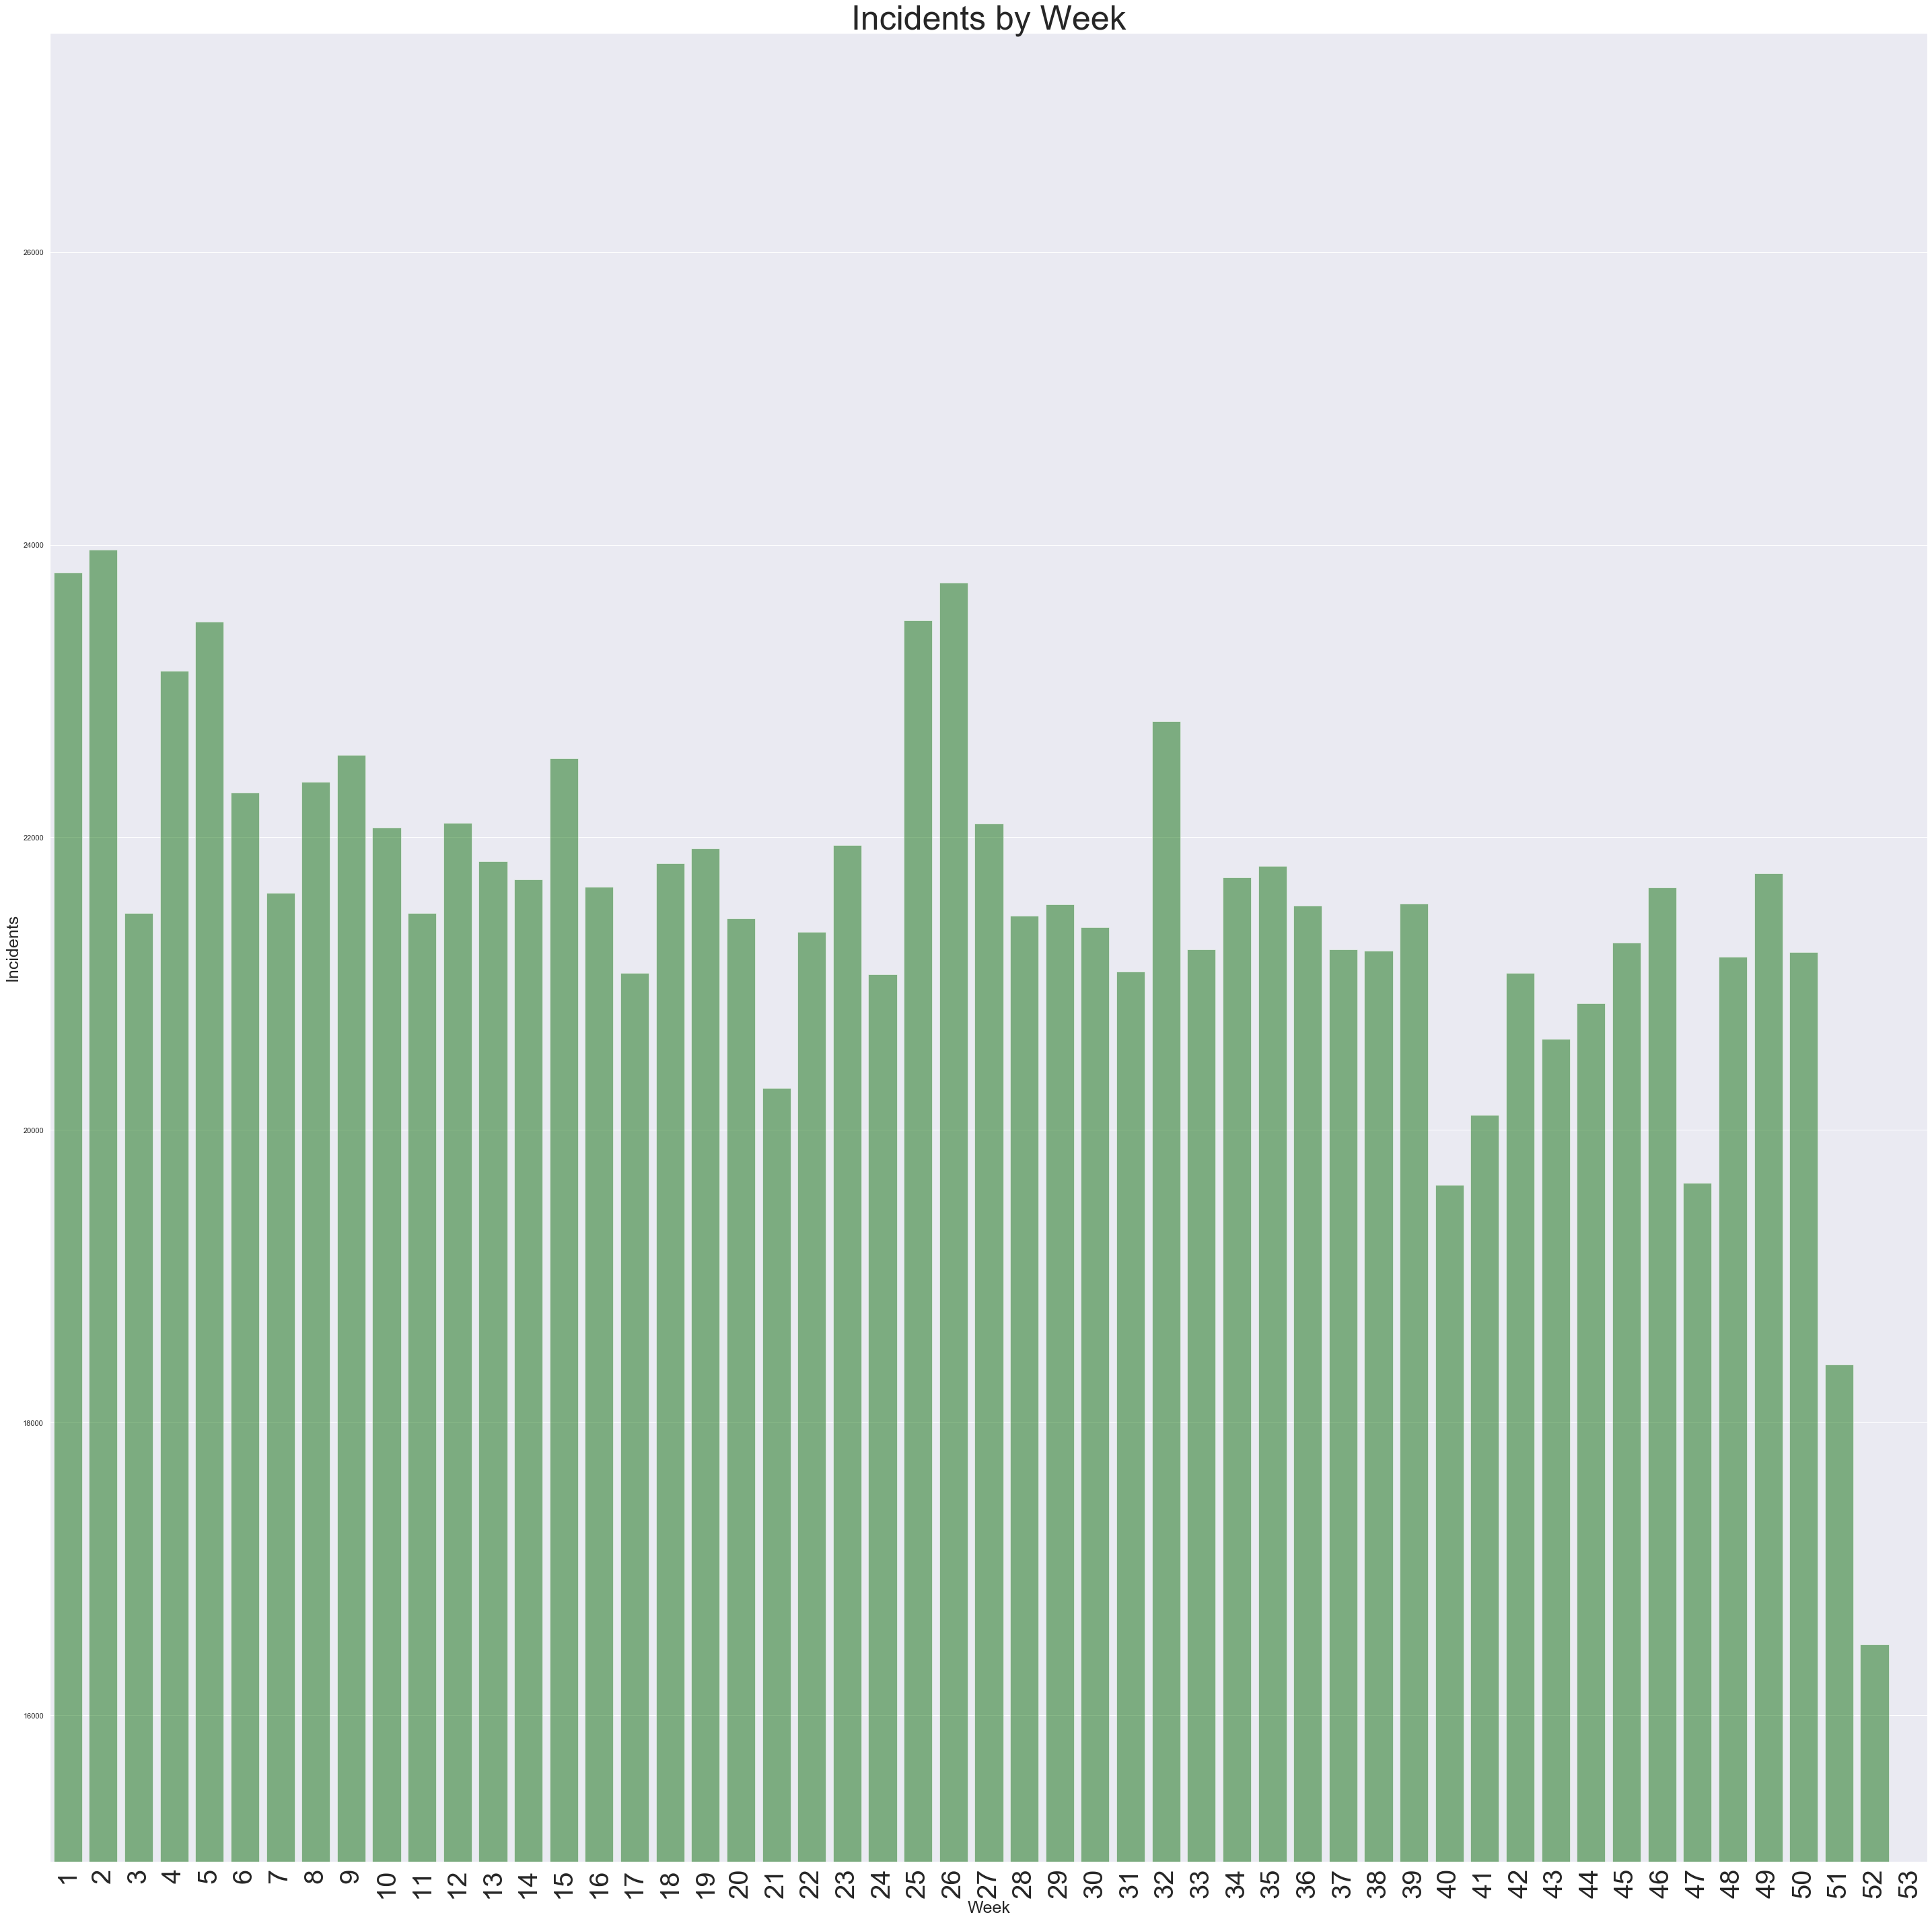

In [18]:
plt.ylim(15000, 27500)

g = sns.barplot(x = "Week",y = "Count", data = wk_ct, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=90, fontsize = 40)
sns.set(rc={'figure.figsize':(100,70)})
plt.title("Incidents by Week", fontsize = 50)
plt.xlabel("Week", fontsize = 25)
plt.ylabel("Incidents", fontsize = 25)
plt.show()

Text(0, 0.5, 'Number of Incidents')

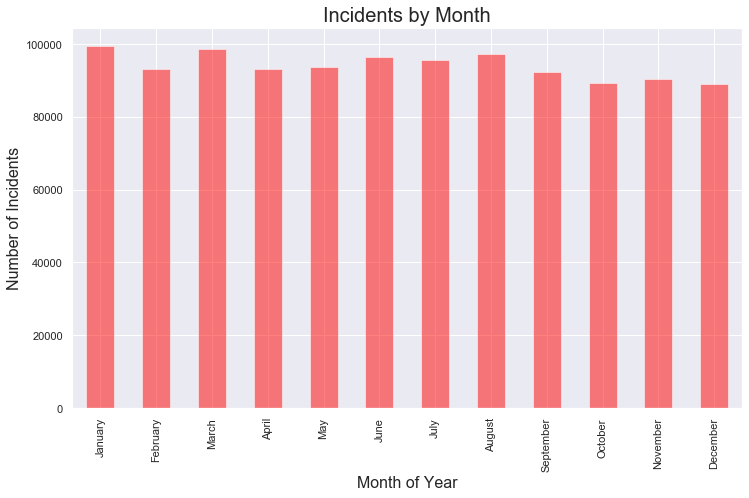

In [19]:
# Number of incidents per Month
mth_incidents = data.groupby(data['call_re'].dt.month).count().call_re

# Replace the month integers by Month names.
mth_incidents.index=[calendar.month_name[x] for x in range(1,13)]

# plot incidents per month
Img2 = mth_incidents.plot(kind='bar',figsize=(12,7), color='red', alpha=0.5, bottom = 0)

# title and x,y labels
plt.title('Incidents by Month', fontsize=20)
plt.xlabel('Month of Year',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Worst Day of Week = Wednesday 
\ Worst Week of Year = 1 
\ Worst Month of Year = January 

## Incidents Reported

In [20]:
inc_ct = data.tc_desc.value_counts()

In [21]:
inc_cts = pd.DataFrame(list(inc_ct.items()))
inc_cts.columns = ['Incident', 'Count']

In [22]:
# Largest x number of incidents

t25 = inc_cts.nlargest(10,['Count'])

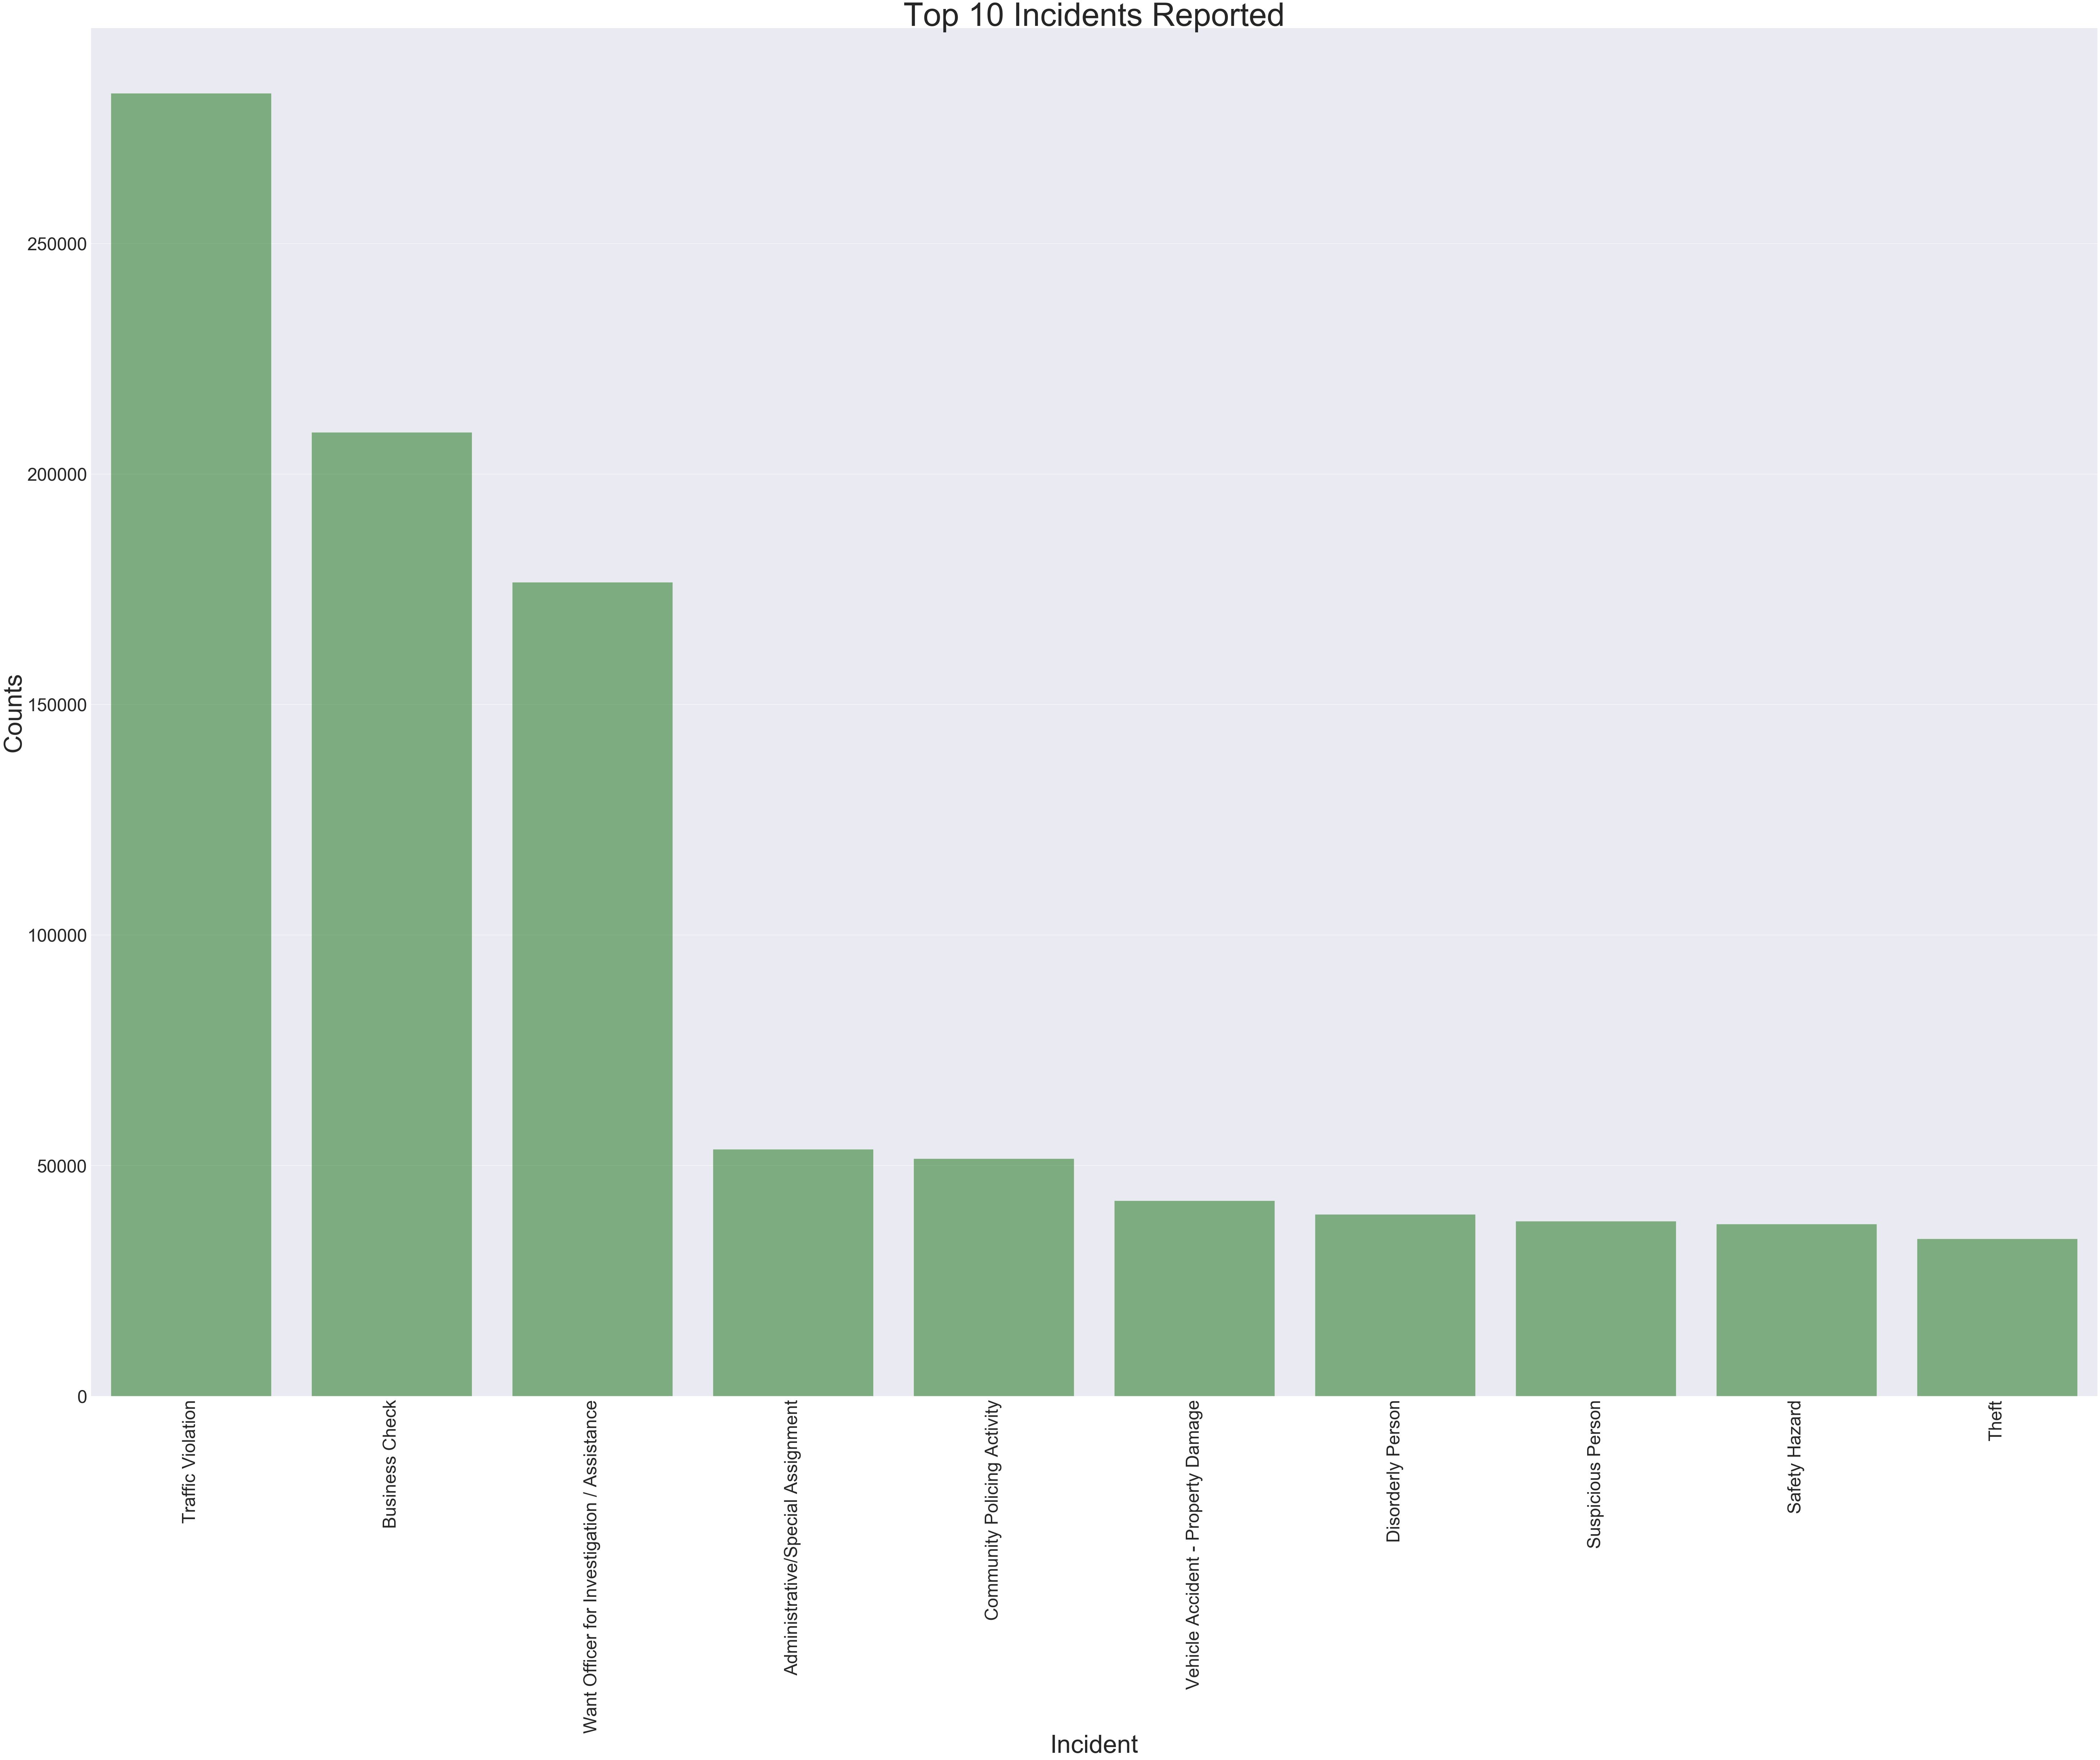

In [23]:

g = sns.barplot(x = "Incident",y = "Count", data = t25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=90, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Top 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

In [24]:
# Smallest x number of incidents

s25 = inc_cts.nsmallest(10,['Count'])

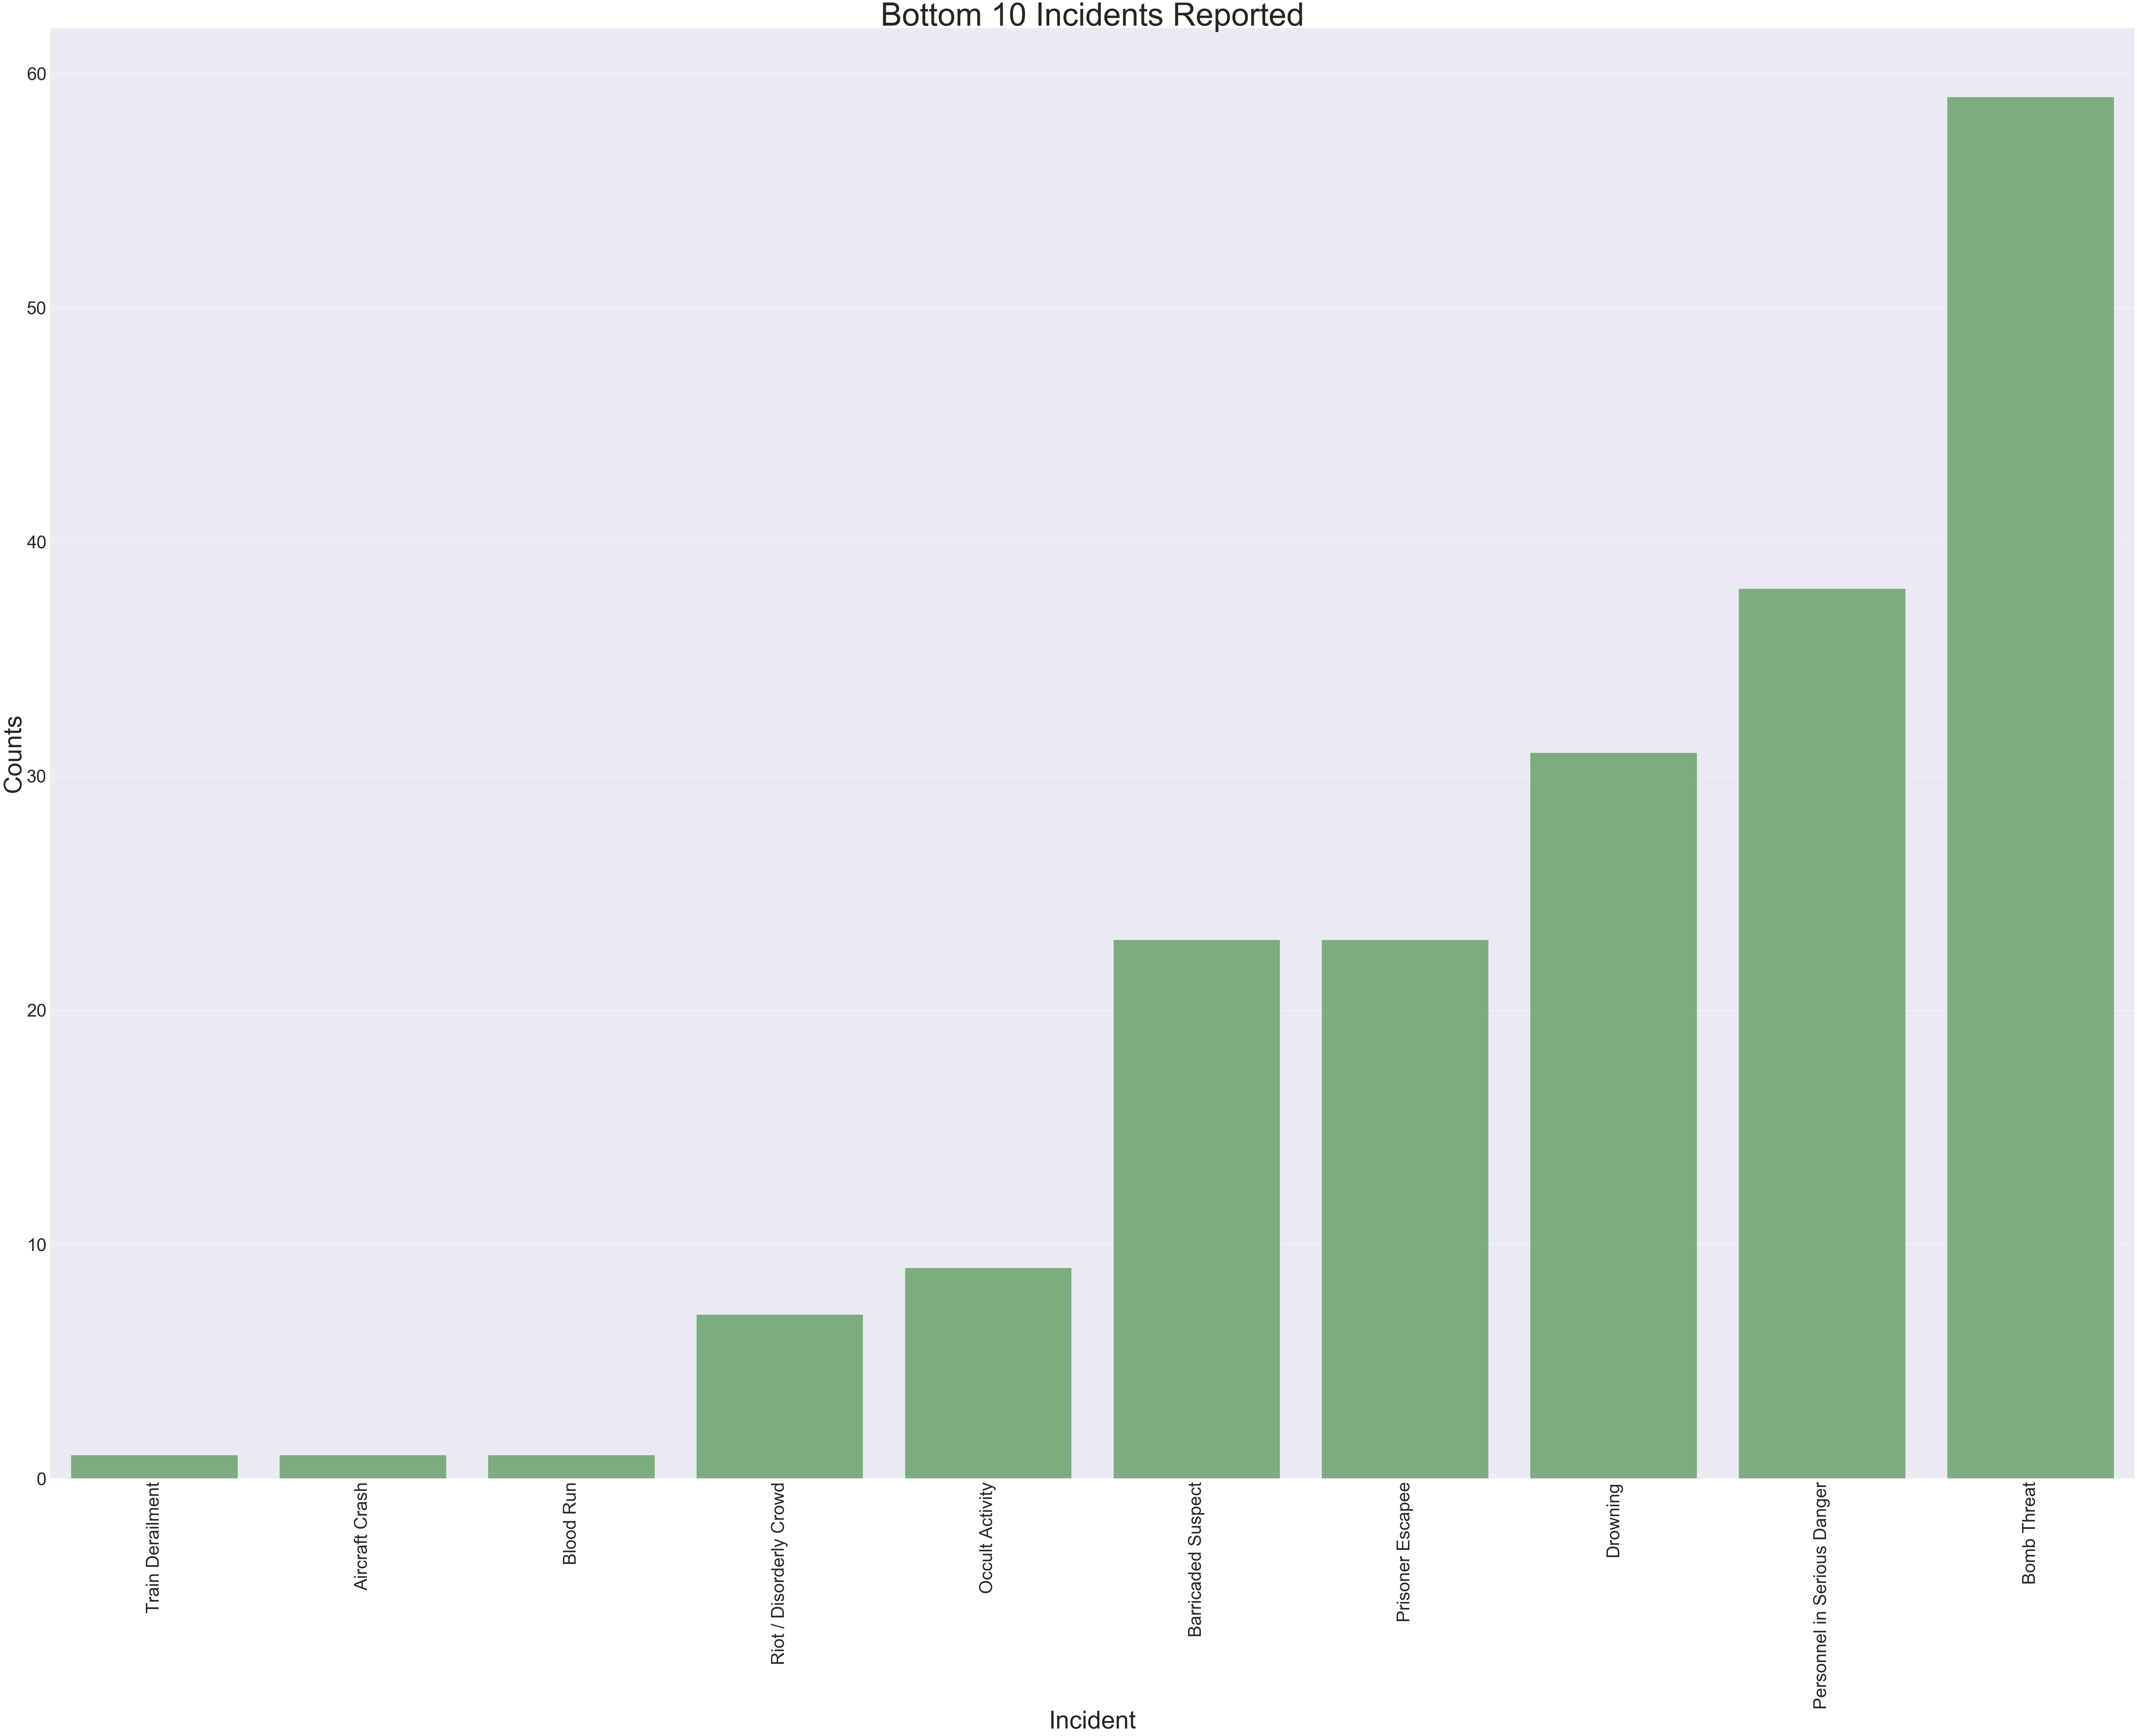

In [25]:

g = sns.barplot(x = "Incident",y = "Count", data = s25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=90, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Bottom 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

In [26]:
# Top Ten Incidents by Month

## Mapping